<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L06-Feed%20Forward%20Networks%20for%20Natural%20Language%20Processing/06_2D_Convolutions_on_Image_Like_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Introduction**

- **What are 2D Convolutions?**
  - **2D Convolutions** are used to process **image data** where the input is a grid of pixels (e.g., a 2D array representing an image).
  - Each convolutional layer applies **filters** (also called kernels) that slide over the image to detect patterns like edges, textures, or shapes.
  - The filter moves across the image, performing **element-wise multiplication** with the input, and produces an output called a **feature map**.

- **Key Concepts**:
  - **Input Channels**: The number of channels in the input image (e.g., 1 for grayscale, 3 for RGB images).
  - **Output Channels**: The number of filters applied in the convolution, each producing its own feature map.
  - **Kernel Size**: The size of the sliding window used to extract local patterns from the image (e.g., 3x3, 5x5).
  
- **Applications**:
  - Image classification (e.g., identifying objects in images).
  - Object detection (e.g., detecting faces, cars, or other objects).
  - Feature extraction (e.g., identifying edges, textures).

**Observation**:
- **2D convolutions** are the backbone of most computer vision models. They allow the network to learn spatial hierarchies by capturing local patterns in images.

---



### 2. **Defining 2D Convolutions**

- **Creating Input Data**:
  - We will create a **4D tensor** to represent a batch of images where:
    - **Batch size**: The number of images processed in parallel.
    - **Input channels**: Number of channels in the image (e.g., 3 for RGB).
    - **Height and width**: The spatial dimensions of the image (e.g., 3x3 or 5x5).

  **Example 1: Defining a Simple 2D Convolution**:
  - Create a tensor of shape `(1, 2, 3, 3)` representing a batch of 1 image with 2 channels (e.g., a 2-channel grayscale image) and a size of `3x3` pixels.
  - Define a **2D convolutional layer** (`conv1`) with:
    - 2 input channels (matching the image’s 2 channels).
    - 1 output channel (meaning we will use 1 filter).
    - A kernel size of `2x2`.

**Code**:


In [1]:
import torch
import torch.nn as nn

# Create input tensor (1 image, 2 channels, 3x3 pixels)
x = torch.randn(1, 2, 3, 3)  # Shape: (batch_size, input_channels, height, width)
print("Input shape:", x.shape)

# Define 2D convolutional layer (2 input channels, 1 output channel, kernel 2x2)
conv1 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2)

# Apply convolution
output = conv1(x)
print("Output shape after conv1:", output.shape)


Input shape: torch.Size([1, 2, 3, 3])
Output shape after conv1: torch.Size([1, 1, 2, 2])



**Explanation**:
- The convolution layer applies a 2x2 filter over the input image, sliding it across the image and producing a smaller output (feature map).
  
**Output Shape**:
- After the convolution, the spatial dimensions of the image (height and width) shrink because the filter captures local information as it moves across the image.

**Observation**:
- The **output size** depends on the kernel size, stride, padding, and input size. A smaller kernel reduces the spatial dimensions of the output.

---



### 3. **Visualizing Convolution Weights**

- **Understanding Convolutional Weights**:
  - The filters (kernels) in the convolution layer are **learnable parameters**. Each filter extracts specific features from the image (e.g., horizontal edges, vertical lines).
  - The weights of the convolutional layer represent the filter values that will be applied to the input image.

- **Printing the Convolution Weights**:
  - The weights of the convolution layer can be accessed and printed. This helps visualize how filters operate during the forward pass.

**Code**:


In [2]:

print("Convolution weights (filter values):")
print(conv1.weight)


Convolution weights (filter values):
Parameter containing:
tensor([[[[ 0.0304,  0.1318],
          [-0.3129, -0.1099]],

         [[-0.0658,  0.3372],
          [ 0.1099,  0.0564]]]], requires_grad=True)



**Explanation**:
- **Convolution weights** (filter values) are initialized randomly at first but will be adjusted during training to capture relevant features (e.g., edges, textures).

**Observation**:
- Each **filter** in the convolutional layer learns to detect different patterns in the image, such as edges, corners, or more complex textures.

**Demonstration**:
- Visualize how the filters operate:


In [3]:
print("Filter shape:", conv1.weight.shape)  # Shows filter size and channels


Filter shape: torch.Size([1, 2, 2, 2])



---

### 4. **Exercise**

- **Modify the Number of Output Channels**:
  - The **number of output channels** defines how many different filters will be applied to the input. Each filter produces a feature map that captures different aspects of the input image.
  
  **Task**:
  - Modify the convolutional layer to have **2 output channels** (i.e., 2 filters), each producing a different feature map:


In [4]:
conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2)
output = conv2(x)
print("Output shape with 2 output channels:", output.shape)


Output shape with 2 output channels: torch.Size([1, 2, 2, 2])



  **Observation**:
  - Increasing the number of output channels increases the number of feature maps produced by the layer, allowing the network to capture more complex and varied patterns.

- **Experiment with Kernel Sizes**:
  - The **kernel size** determines the size of the region in the input image that the filter covers at each step. Larger kernels capture broader patterns, while smaller kernels capture finer details.
  
  **Task**:
  - Change the kernel size to `3x3` and observe how the output shape changes:


In [5]:

conv3 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3)
output = conv3(x)
print("Output shape with 3x3 kernel:", output.shape)


Output shape with 3x3 kernel: torch.Size([1, 2, 1, 1])



  **Explanation**:
  - A larger kernel reduces the spatial dimensions more significantly because it captures a larger portion of the image at each step.

**Observation**:
- **Larger kernels** tend to capture broader, more general patterns in the image, while **smaller kernels** capture finer, more localized details.

---



### 5. **Conclusion**

- **Recap**:
  - **2D Convolutions** are essential for feature extraction in image data, where they learn to detect local patterns (e.g., edges, textures).
  - **Filters** (kernels) are the learnable parameters of the convolutional layer, and each filter captures different features in the image.
  - The output of a convolutional layer is a **feature map** that represents the detected patterns at various locations in the input image.
  
- **Relationship Between Kernel Size, Stride, and Output Size**:
  - The size of the output feature map depends on several factors:
    - **Kernel size**: Larger kernels reduce the spatial dimensions more.
    - **Stride**: The step size of the filter as it moves across the image. Larger strides reduce the output size more quickly.
    - **Padding**: Adding padding around the input image helps preserve spatial dimensions after convolution.

**Quiz**:
- What happens to the output size when you increase the kernel size?
- How does increasing the number of output channels affect the model’s ability to detect patterns?

**Takeaway**:
- 2D convolutions are a powerful tool for image processing because they allow the network to automatically learn relevant features from the data, making them a cornerstone of modern computer vision models.

---


## Observations:



### 1. **Observation: 2D Convolutions Learn Local Patterns in Images**
   - **2D convolutions** allow CNNs to detect spatial patterns like edges, textures, or shapes in images. Each convolutional layer applies multiple filters (kernels) to the input image, extracting local features.
   - **Demonstration**:


In [6]:
import torch
import torch.nn as nn

# Create input tensor (1 image, 2 channels, 3x3 pixels)
x = torch.randn(1, 2, 3, 3)  # Shape: (batch_size, channels, height, width)
print("Input shape:", x.shape)

# Define 2D convolutional layer (2 input channels, 1 output channel, kernel size 2x2)
conv1 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2)

# Apply convolution
output = conv1(x)
print("Output shape after conv1:", output.shape)


Input shape: torch.Size([1, 2, 3, 3])
Output shape after conv1: torch.Size([1, 1, 2, 2])



### 2. **Observation: Output Size Depends on Kernel Size, Stride, Padding, and Input Size**
   - The size of the output feature map is determined by the kernel size, stride, padding, and the input image size.
   - **Demonstration**:


In [7]:
print("Input size:", x.shape)
print("Kernel size:", conv1.kernel_size)
print("Output size after convolution:", output.shape)

# Smaller kernel sizes and larger strides reduce the output size. Padding can help preserve the original input size.


Input size: torch.Size([1, 2, 3, 3])
Kernel size: (2, 2)
Output size after convolution: torch.Size([1, 1, 2, 2])



### 3. **Observation: Convolutional Layer Weights are Learnable Parameters**
   - The filters (kernels) in a convolutional layer are **learnable parameters**, meaning they are updated during training to capture relevant features.
   - **Demonstration**:


In [8]:
print("Convolution weights (filter values):")
print(conv1.weight)

# The weights of the convolutional layer start with random initialization and are adjusted during training to capture patterns such as edges or textures.


Convolution weights (filter values):
Parameter containing:
tensor([[[[-0.2693,  0.1791],
          [-0.1832,  0.3400]],

         [[-0.0794,  0.0911],
          [-0.0279, -0.1263]]]], requires_grad=True)



### 4. **Observation: Increasing Output Channels Increases Feature Maps**
   - Each output channel corresponds to a different filter applied to the input. More output channels mean more feature maps, each capturing different aspects of the input image.
   - **Demonstration**:


In [9]:
conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2)  # Two filters
output = conv2(x)
print("Output shape with 2 output channels:", output.shape)

# By increasing the number of output channels, the model learns a broader set of features. In this example, the output shape changes from `(1, 1, 2, 2)` to `(1, 2, 2, 2)`.


Output shape with 2 output channels: torch.Size([1, 2, 2, 2])



### 5. **Observation: Changing Kernel Size Affects the Output**
   - A larger kernel size reduces the spatial dimensions of the output more significantly as it captures a larger portion of the input image at each step.
   - **Demonstration**:


In [10]:
conv3 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3)  # Kernel size 3x3
output = conv3(x)
print("Output shape with 3x3 kernel:", output.shape)

# The output size is much smaller when a 3x3 kernel is used. This is because a larger kernel covers more of the image, reducing the output dimensions faster.


Output shape with 3x3 kernel: torch.Size([1, 2, 1, 1])



### 6. **Observation: Larger Kernels Capture Broader Patterns, Smaller Kernels Capture Finer Details**
   - Larger kernels are better at capturing broad, global patterns (e.g., shapes), while smaller kernels capture finer, more localized details (e.g., edges).
   - **Demonstration**:


In [11]:
print("Small kernel (2x2) captures fine details, larger kernel (3x3) captures broad patterns.")
# Example of smaller and larger kernel application shown previously


# For tasks where capturing fine details is important (e.g., object detection), smaller kernels are often preferred. For capturing global context, larger kernels are useful.


Small kernel (2x2) captures fine details, larger kernel (3x3) captures broad patterns.



### 7. **Observation: Visualizing Filters and Feature Maps**
   - Each filter learns to detect a specific feature, such as edges, textures, or more complex shapes. Printing the filter values shows how they are applied to the image.
   - **Demonstration**:


In [12]:
print("Visualizing filters:")
print(conv1.weight.shape)  # Shape of the filter (1, 2, 2, 2)
print("Convolution weights:", conv1.weight)


# This demonstrates the shape of the convolutional filters and how they affect the input. Each filter extracts unique features during the forward pass.


Visualizing filters:
torch.Size([1, 2, 2, 2])
Convolution weights: Parameter containing:
tensor([[[[-0.2693,  0.1791],
          [-0.1832,  0.3400]],

         [[-0.0794,  0.0911],
          [-0.0279, -0.1263]]]], requires_grad=True)



### 8. **Observation: Padding Helps Preserve Spatial Dimensions**
   - Adding padding around the input can help preserve the input's original dimensions after convolution.
   - **Demonstration**:


In [13]:
conv_with_padding = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2, padding=1)
padded_output = conv_with_padding(x)
print("Output shape with padding:", padded_output.shape)

# The padding ensures that the output’s spatial dimensions are closer to the original input’s dimensions, which is useful when you want to maintain a certain size.


Output shape with padding: torch.Size([1, 1, 4, 4])



### 9. **Observation: Stride Affects How Much the Filter Moves Across the Input**
   - Stride determines how far the filter moves in each step. Larger strides reduce the output size by skipping over parts of the input.
   - **Demonstration**:


In [14]:
conv_with_stride = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2, stride=2)
stride_output = conv_with_stride(x)
print("Output shape with stride 2:", stride_output.shape)

# With a stride of 2, the output size is halved compared to a stride of 1. Stride is useful for reducing the dimensions of the feature map without using pooling.


Output shape with stride 2: torch.Size([1, 1, 1, 1])



### 10. **Observation: Multiple Convolutional Layers Capture More Complex Patterns**
   - Stacking convolutional layers allows the network to build upon the simple features captured by earlier layers and detect more complex patterns in the data.
   - **Demonstration**:


In [15]:
class MultiConvCNN(nn.Module):
    def __init__(self):
        super(MultiConvCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=2, out_channels=4, kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

# Create an instance of the model and pass the input through multiple convolutional layers
multi_conv_model = MultiConvCNN()
output = multi_conv_model(x)
print("Output shape after multiple convolutions:", output.shape)

# The first layer detects simple features like edges, while the second layer builds on those to capture more complex features like textures or shapes. Each layer adds more depth and complexity to the feature extraction process.


Output shape after multiple convolutions: torch.Size([1, 8, 1, 1])



### 11. **Observation: Increasing the Number of Input Channels Increases Complexity**
   - The number of input channels corresponds to the depth of the input data. More input channels increase the complexity of the convolutional layer, allowing the model to process multi-channel data (e.g., RGB images with 3 channels or multi-spectral images with more than 3 channels).
   
   - **Demonstration**:


In [16]:
# Create a tensor with 3 input channels (e.g., an RGB image with height=5, width=5)
x = torch.randn(1, 3, 5, 5)  # Shape: (batch_size, input_channels, height, width)
print("Input shape with 3 channels:", x.shape)

# Define a 2D convolutional layer with 3 input channels and 2 output channels
conv = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3)

# Apply convolution
output = conv(x)
print("Output shape after convolution with 3 input channels:", output.shape)

# This demonstrates how the number of input channels affects the convolutional layer's operation. Each filter processes all the input channels, combining information from them to produce the output feature maps.


Input shape with 3 channels: torch.Size([1, 3, 5, 5])
Output shape after convolution with 3 input channels: torch.Size([1, 2, 3, 3])



### 12. **Observation: Pooling Layers Reduce Spatial Dimensions and Focus on Important Features**
   - Pooling layers are used to downsample feature maps by reducing their spatial dimensions, while retaining the most important information (e.g., maximum values in max pooling).
   
   - **Demonstration**:


In [17]:
# Define a 2D max pooling layer with a 2x2 kernel
pool = nn.MaxPool2d(kernel_size=2, stride=2)

# Create an input tensor with a larger spatial dimension
x = torch.randn(1, 1, 6, 6)  # Shape: (batch_size, channels, height, width)
print("Input shape before pooling:", x.shape)

# Apply max pooling
pooled_output = pool(x)
print("Output shape after max pooling:", pooled_output.shape)

# Max pooling reduces the input size by taking the maximum value from each 2x2 region. This operation helps to reduce the computational load and focus on the most significant features of the image.


Input shape before pooling: torch.Size([1, 1, 6, 6])
Output shape after max pooling: torch.Size([1, 1, 3, 3])



### 13. **Observation: Batch Size Affects How Many Images Are Processed Simultaneously**
   - The batch size determines how many images or samples are processed in parallel. Larger batch sizes allow more data to be processed at once, increasing efficiency during training.
   
   - **Demonstration**:


In [18]:
# Create input tensor with batch size of 4 (4 images, each with 1 channel, 5x5 pixels)
x = torch.randn(4, 1, 5, 5)  # Shape: (batch_size, channels, height, width)
print("Input shape with batch size 4:", x.shape)

# Define a 2D convolutional layer
conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

# Apply convolution
output = conv(x)
print("Output shape after convolution with batch size 4:", output.shape)

# Batch size affects how many samples are processed simultaneously during training or inference. In this example, four images are processed at once, each resulting in a corresponding output after the convolution operation.


Input shape with batch size 4: torch.Size([4, 1, 5, 5])
Output shape after convolution with batch size 4: torch.Size([4, 3, 3, 3])



### 14. **Observation: Multiple Convolutions and Pooling Layers Can Be Stacked to Learn Hierarchical Features**
   - By stacking multiple convolutional and pooling layers, CNNs can learn hierarchical representations. Early layers capture low-level features (e.g., edges), while deeper layers capture more abstract features (e.g., shapes, textures).
   
   - **Demonstration**:


Initializing CNN with two convolutional and two pooling layers.
Layer 1: Convolutional Layer with 1 input channel and 6 output channels, kernel size 3x3.
Layer 2: Max Pooling Layer with 2x2 window and stride 2.
Layer 3: Convolutional Layer with 6 input channels and 12 output channels, kernel size 3x3.
Layer 4: Max Pooling Layer with 2x2 window and stride 2.

CNN Model Initialized with two convolutional and two pooling layers.

==== Model Architecture Description ====
First Convolutional Layer:
	Input: 1 channel, Output: 6 channels, Kernel: 3x3.
First layer detects basic features such as edges in the image.
First Pooling Layer:
	Max Pooling with 2x2 window. Reduces spatial dimensions while preserving important features.
Second Convolutional Layer:
	Input: 6 channels, Output: 12 channels, Kernel: 3x3.
Second layer detects more complex patterns formed by combinations of edges, such as shapes.
Second Pooling Layer:
	Max Pooling with 2x2 window. Further reduces spatial dimensions and enhanc

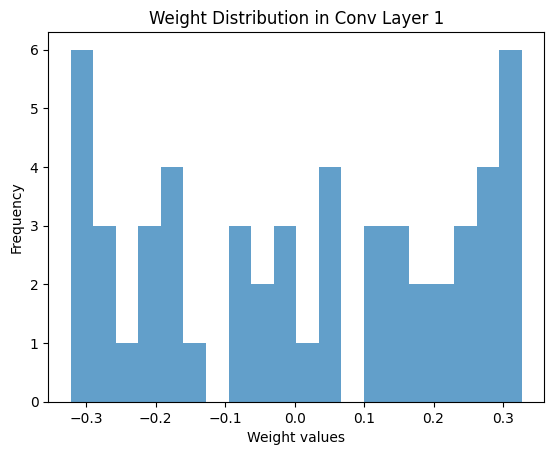

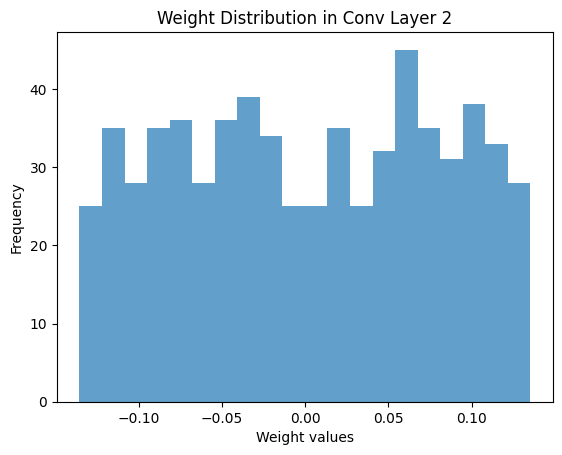


Forward Pass with Scaled Input
Scaled Input:
tensor([[[[ 8.5879e+00,  1.8717e+02, -9.4950e+01, -2.1315e+01,  5.1511e+00,
            3.3121e+01,  4.1350e+01, -7.5559e+01, -1.0287e+01,  1.2373e+02,
            1.1978e+01, -1.8765e+02],
          [ 1.4907e+02,  2.2726e+02,  5.2586e+01, -1.6160e+02, -2.1773e+02,
           -1.7862e+02, -2.5021e+01,  9.4239e+01,  4.4940e+01,  1.3293e+02,
            2.7630e+01, -3.4190e+01],
          [-9.2466e+00, -1.0746e+02, -1.8250e+02,  1.0506e+02,  1.7623e+02,
            9.0912e+01, -7.2970e+01, -3.7718e+01, -1.2182e+02,  8.5874e+01,
           -1.2910e+02, -3.7221e+01],
          [-8.4600e+01, -6.9826e+01, -1.1024e+02, -2.6193e+01,  1.5840e+02,
           -1.4580e+02, -1.0437e+02,  3.1008e+01, -7.6572e+01,  4.0558e+01,
           -1.8609e+02,  1.6276e+01],
          [-1.2846e+02,  1.0148e+02,  1.3994e+02, -2.1786e+01, -6.2665e+01,
            2.0207e+01,  4.7728e+01, -1.3362e+01,  3.2497e+02,  6.4790e+01,
           -8.9799e+01, -4.5963e+01],
    

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the necessary module for activation functions

class CNNModel(nn.Module):  # Define a Convolutional Neural Network (CNN) model
    def __init__(self):
        super(CNNModel, self).__init__()  # Call the parent class's constructor to initialize the network

        # Describe the overall architecture
        print("Initializing CNN with two convolutional and two pooling layers.")

        # First convolutional layer: 1 input channel, 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        print("Layer 1: Convolutional Layer with 1 input channel and 6 output channels, kernel size 3x3.")

        # First pooling layer: 2x2 pooling with stride of 2
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        print("Layer 2: Max Pooling Layer with 2x2 window and stride 2.")

        # Second convolutional layer: 6 input channels, 12 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3)
        print("Layer 3: Convolutional Layer with 6 input channels and 12 output channels, kernel size 3x3.")

        # Second pooling layer: 2x2 pooling with stride of 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        print("Layer 4: Max Pooling Layer with 2x2 window and stride 2.")

        # Describe the architecture summary after initialization
        print("\nCNN Model Initialized with two convolutional and two pooling layers.")

    def forward(self, x):
        # Describe the input before passing through layers
        print(f"\nForward Pass - Input Tensor Shape: {x.shape}")

        # Apply first convolution, activation (ReLU), and pooling
        x = self.pool1(F.relu(self.conv1(x)))
        print(f"After Layer 1 (Conv1 -> ReLU -> Pool1) - Tensor Shape: {x.shape}")

        # Apply second convolution, activation (ReLU), and pooling
        x = self.pool2(F.relu(self.conv2(x)))
        print(f"After Layer 2 (Conv2 -> ReLU -> Pool2) - Tensor Shape: {x.shape}")

        return x

    def describe_model_architecture(self):
        # Additional method to describe the architecture in more detail
        print("\n==== Model Architecture Description ====")
        print(f"First Convolutional Layer:\n\t"
              f"Input: 1 channel, Output: 6 channels, Kernel: 3x3.")
        print("First layer detects basic features such as edges in the image.")

        print(f"First Pooling Layer:\n\t"
              f"Max Pooling with 2x2 window. Reduces spatial dimensions while preserving important features.")

        print(f"Second Convolutional Layer:\n\t"
              f"Input: 6 channels, Output: 12 channels, Kernel: 3x3.")
        print("Second layer detects more complex patterns formed by combinations of edges, such as shapes.")

        print(f"Second Pooling Layer:\n\t"
              f"Max Pooling with 2x2 window. Further reduces spatial dimensions and enhances features.")
        print("========================================\n")

# Instantiate the CNN model
model = CNNModel()

# Call the method to describe the architecture in more detail
model.describe_model_architecture()

# Create an input tensor (batch size=1, 1 input channel, 12x12 pixels)
x = torch.randn(1, 1, 12, 12)

# Forward pass through the network
output = model(x)
print(f"\nFinal Output Shape: {output.shape}")

# Observing Layer Weights and Biases for further understanding
print("\n==== Layer Weights and Biases Observation ====")
print(f"Conv1 Weights:\n{model.conv1.weight}")
print(f"Conv1 Biases:\n{model.conv1.bias}")
print(f"Conv2 Weights:\n{model.conv2.weight}")
print(f"Conv2 Biases:\n{model.conv2.bias}")
print("===============================================")

# Demonstration with larger batch of inputs
batch_input = torch.randn(5, 1, 12, 12)  # Simulating a batch of 5 input samples
print("\nForward Pass with Batch of Inputs")
print(f"Input Shape (Batch of 5 samples): {batch_input.shape}")

# Forward pass for the batch
batch_output = model(batch_input)
print(f"Output Shape after Forward Pass with Batch: {batch_output.shape}\n")

# Visualizing the weight distribution for both convolutional layers (Optional)
import matplotlib.pyplot as plt

def plot_weights(layer, layer_name):
    # Plot the weights of the given convolutional layer
    plt.hist(layer.weight.detach().numpy().flatten(), bins=20, alpha=0.7)
    plt.title(f"Weight Distribution in {layer_name}")
    plt.xlabel("Weight values")
    plt.ylabel("Frequency")
    plt.show()

# Visualize the weight distribution for Conv1 and Conv2
plot_weights(model.conv1, "Conv Layer 1")
plot_weights(model.conv2, "Conv Layer 2")

# Analyzing the effect of input scaling
scaled_input = torch.randn(1, 1, 12, 12) * 100  # Creating a scaled-up version of the input
print("\nForward Pass with Scaled Input")
print(f"Scaled Input:\n{scaled_input}")

# Pass scaled input through the network
scaled_output = model(scaled_input)
print(f"Output for Scaled Input: {scaled_output}\n")




### 15. **Observation: Using Non-linear Activation Functions Like ReLU Introduces Non-linearity**
   - Non-linear activation functions, such as **ReLU (Rectified Linear Unit)**, are applied after each convolution to introduce non-linearity into the model, which allows CNNs to learn complex, non-linear relationships.
   
   - **Demonstration**:


In [25]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

# Create an input tensor
x = torch.randn(1, 1, 5, 5)

# Apply convolution
conv_output = conv(x)
print("Convolution output before ReLU:", conv_output)

# Apply ReLU activation
relu_output = F.relu(conv_output)
print("Convolution output after ReLU:", relu_output)

# After the convolution, some negative values are produced. The **ReLU activation** function sets all negative values to zero, allowing the model to focus only on positive activations, which helps with efficient learning.


Convolution output before ReLU: tensor([[[[ 0.4818, -0.7846, -0.2429],
          [-1.0451, -0.4941, -0.5844],
          [-1.3912, -0.3852,  0.2174]],

         [[-0.6647, -0.1456,  0.1431],
          [ 0.0416, -0.7185,  0.1041],
          [-0.2716,  0.5564, -0.6613]],

         [[ 0.9184, -0.3555,  0.1617],
          [-0.3226, -0.2905, -0.3486],
          [-1.0145, -0.6723,  0.1885]]]], grad_fn=<ConvolutionBackward0>)
Convolution output after ReLU: tensor([[[[0.4818, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.2174]],

         [[0.0000, 0.0000, 0.1431],
          [0.0416, 0.0000, 0.1041],
          [0.0000, 0.5564, 0.0000]],

         [[0.9184, 0.0000, 0.1617],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1885]]]], grad_fn=<ReluBackward0>)
